In [79]:
from qiskit import execute
from qiskit import BasicAer, Aer
from qiskit import IBMQ, QuantumCircuit
from qiskit.providers.fake_provider import FakeManila
from qiskit.providers.aer.noise import NoiseModel
from qiskit.utils import QuantumInstance
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter, complete_meas_cal
from qiskit.tools.visualization import plot_histogram
import numpy as np
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

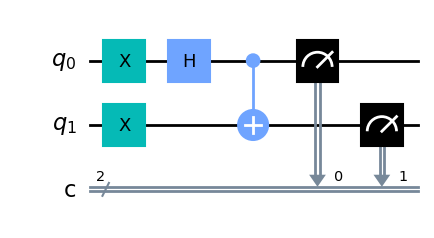

In [80]:
bell = QuantumCircuit(2,2)
bell.x(0)
bell.h(0)
bell.x(1)
bell.cx(0,1)
bell.measure([0,1],[0,1])
bell.draw(output = 'mpl')

In [81]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-02-11 15:28:38,462: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [82]:
backend1 = Aer.get_backend('aer_simulator')
device = FakeManila()
noise_model = NoiseModel.from_backend(device)
backend2 = Aer.get_backend('qasm_simulator')

In [83]:
res1 = execute(bell, backend = backend1, shots = 1024, noise_model = noise_model).result()
raw_counts = res1.get_counts()
res2 = execute(bell, backend = backend2, shots =1024).result()
sim_counts = res2.get_counts()

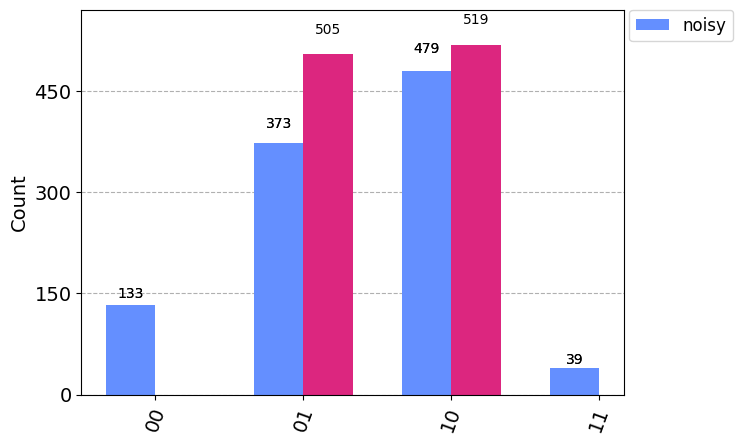

In [112]:
plot_histogram([raw_counts, sim_counts], legend=['noisy','sim'])

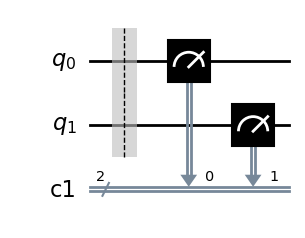

In [88]:
cal_bell, state_labels = complete_meas_cal(qr = bell.qregs[0], circlabel = 'measerrormitigationcal')
cal_bell[0].draw(output='mpl')

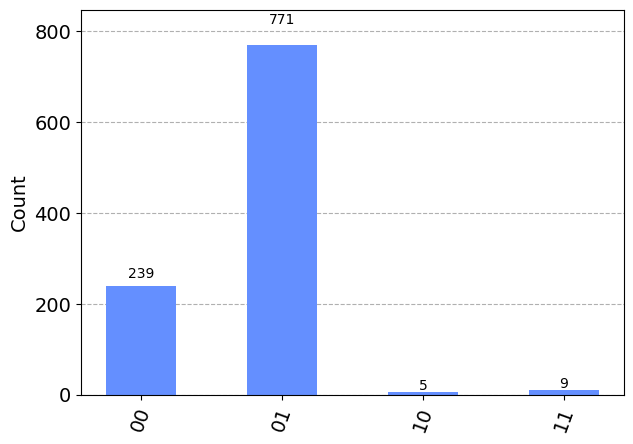

In [109]:
cal_result = execute(cal_bell, backend = backend2, shots = 1024, noise_model = noise_model).result()
cal_counts = cal_result.get_counts(cal_bell[1])
plot_histogram(cal_counts)

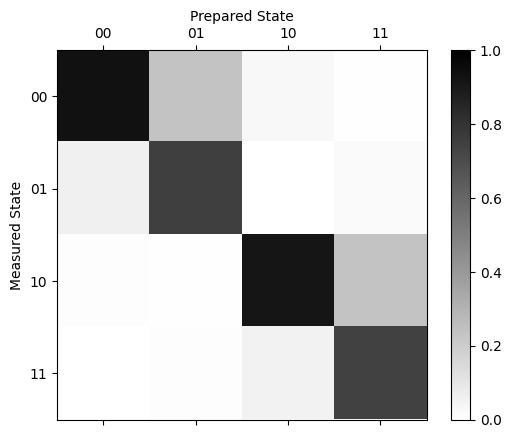

In [110]:
meas_fitter = CompleteMeasFitter(cal_result, state_labels)
meas_fitter.plot_calibration()

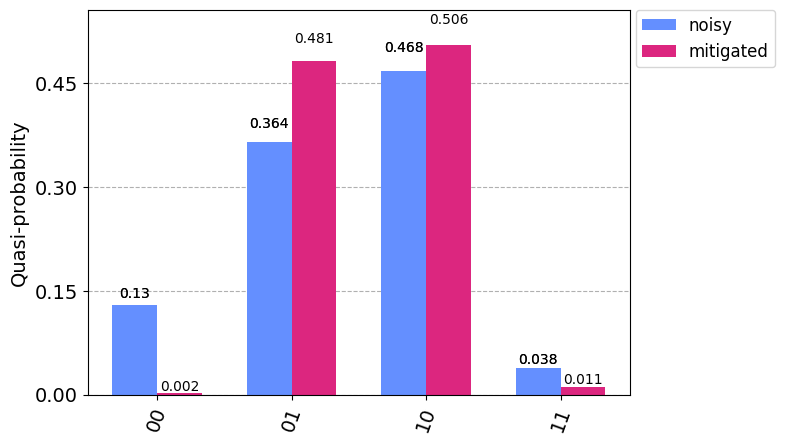

In [111]:
meas_filter = meas_fitter.filter
res3 = meas_filter.apply(res1)
mitigated_counts = res3.get_counts()
plot_histogram([raw_counts, mitigated_counts], legend=['noisy', 'mitigated'])